# A/B Testing Marketing Promotions

Which promotion was the most effective?

**Scenario:**

A fast food chain is testing three different marketing campaigns to promote a new menu item. They are randomly selecting markets and using a different promotion in each market. The weekly sales of the new item are being tracked for the first four weeks to see which promotion is most effective.

**The description of the data set:**
data set consists of 548 entries including:

* **MarketId:** A code used internally to categorize market types. It won't be used in the analysis.
* **AgeOfStores:** The number of years a store has been open (between 1 and 28 years). The average store age is 8.5 years.
* **LocationID:** A unique number assigned to each store location. There are 137 stores in total.
* **Promotion:** The marketing campaign used for the new menu item. There were three promotions tested, numbered 1, 2, and 3. The specific details of each promotion are not provided.
* **Sales in Thousands:** The sales amount in thousands of dollars for a specific store (identified by LocationID), promotion (Promotion), and week (Week). The average sales amount is 53.5 thousand dollars.
* **Market size:** The category of market size a store is located in: small, medium, or large.
* **Week:** The week during which the promotions were tested (between 1 and 4).

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('FAST_FOOD_DATA.csv')

In [28]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [29]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


# EDA and Visualizations

Text(0.5, 1.0, 'Sales Distribution in 3 Different Promotions')

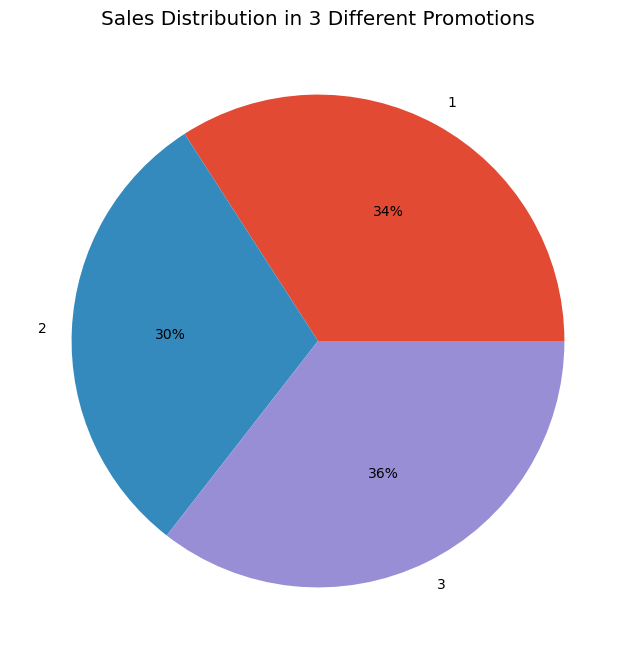

In [30]:
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Sales Distribution in 3 Different Promotions')

In [31]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [32]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


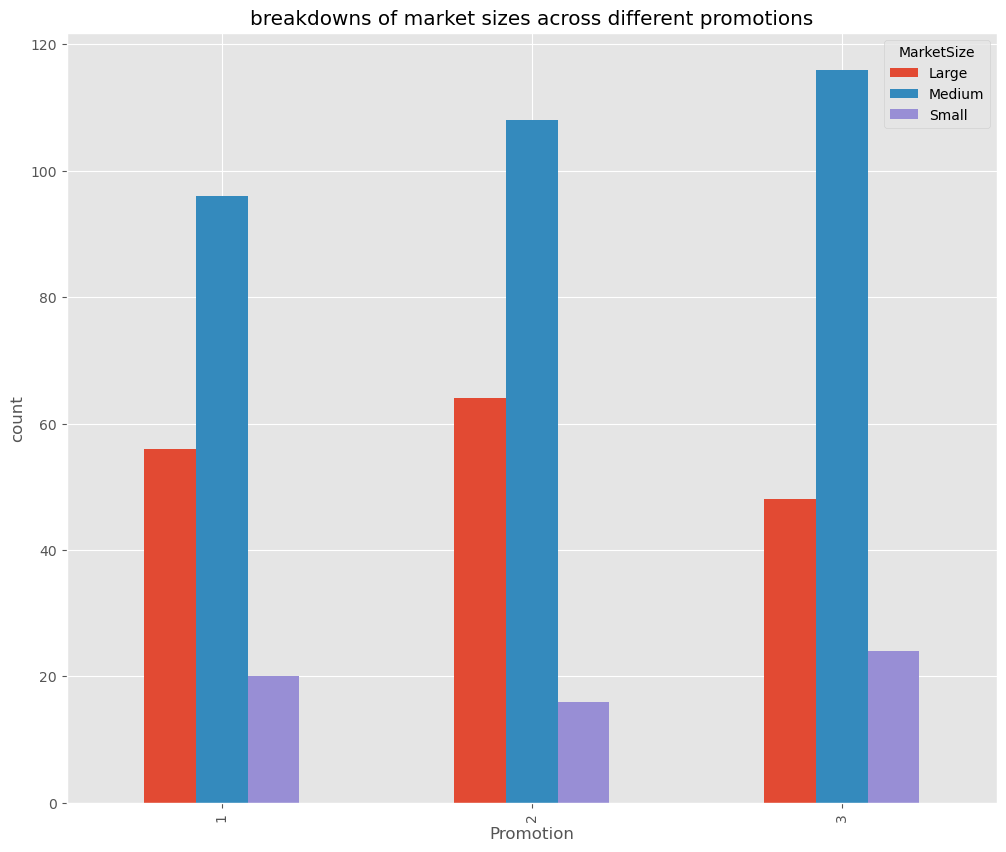

In [33]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

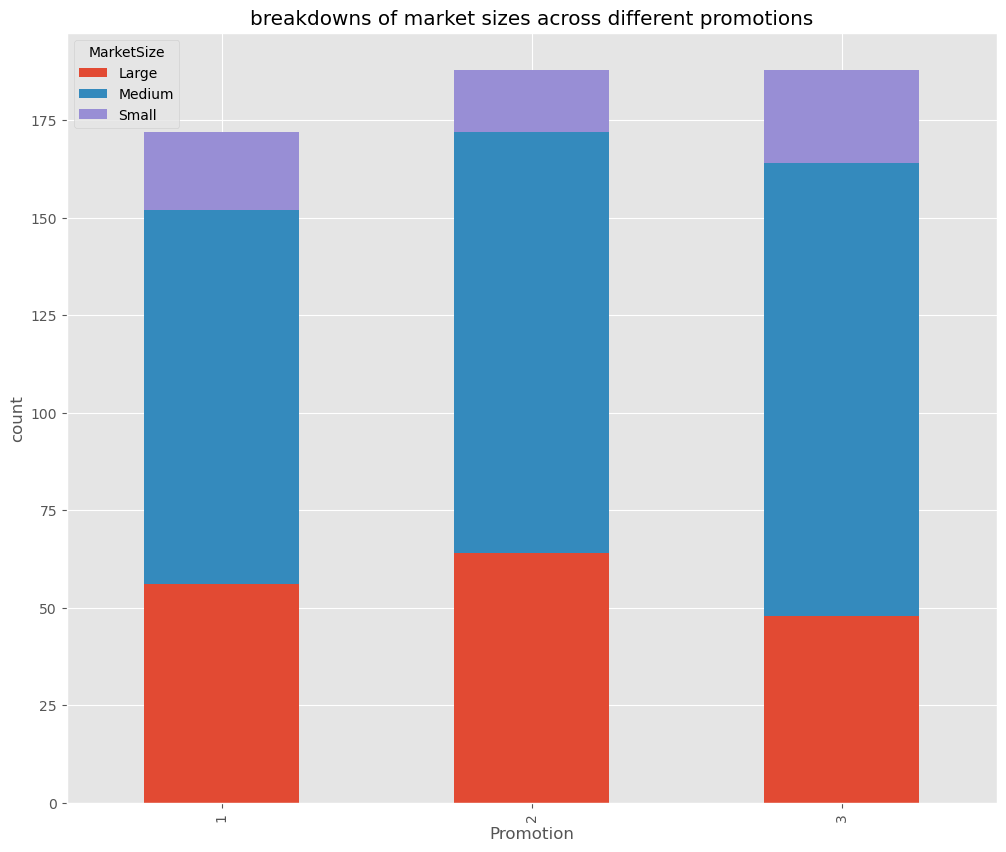

In [34]:
# Put this into a different plot
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

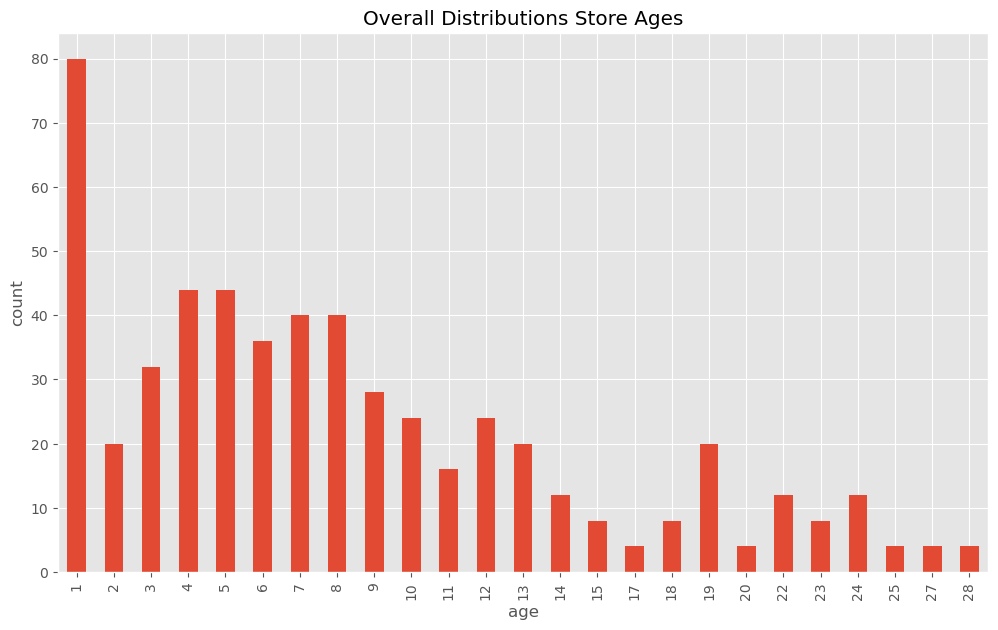

In [35]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

In [36]:
# Group by Age of Store and Promotion to get counts
df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

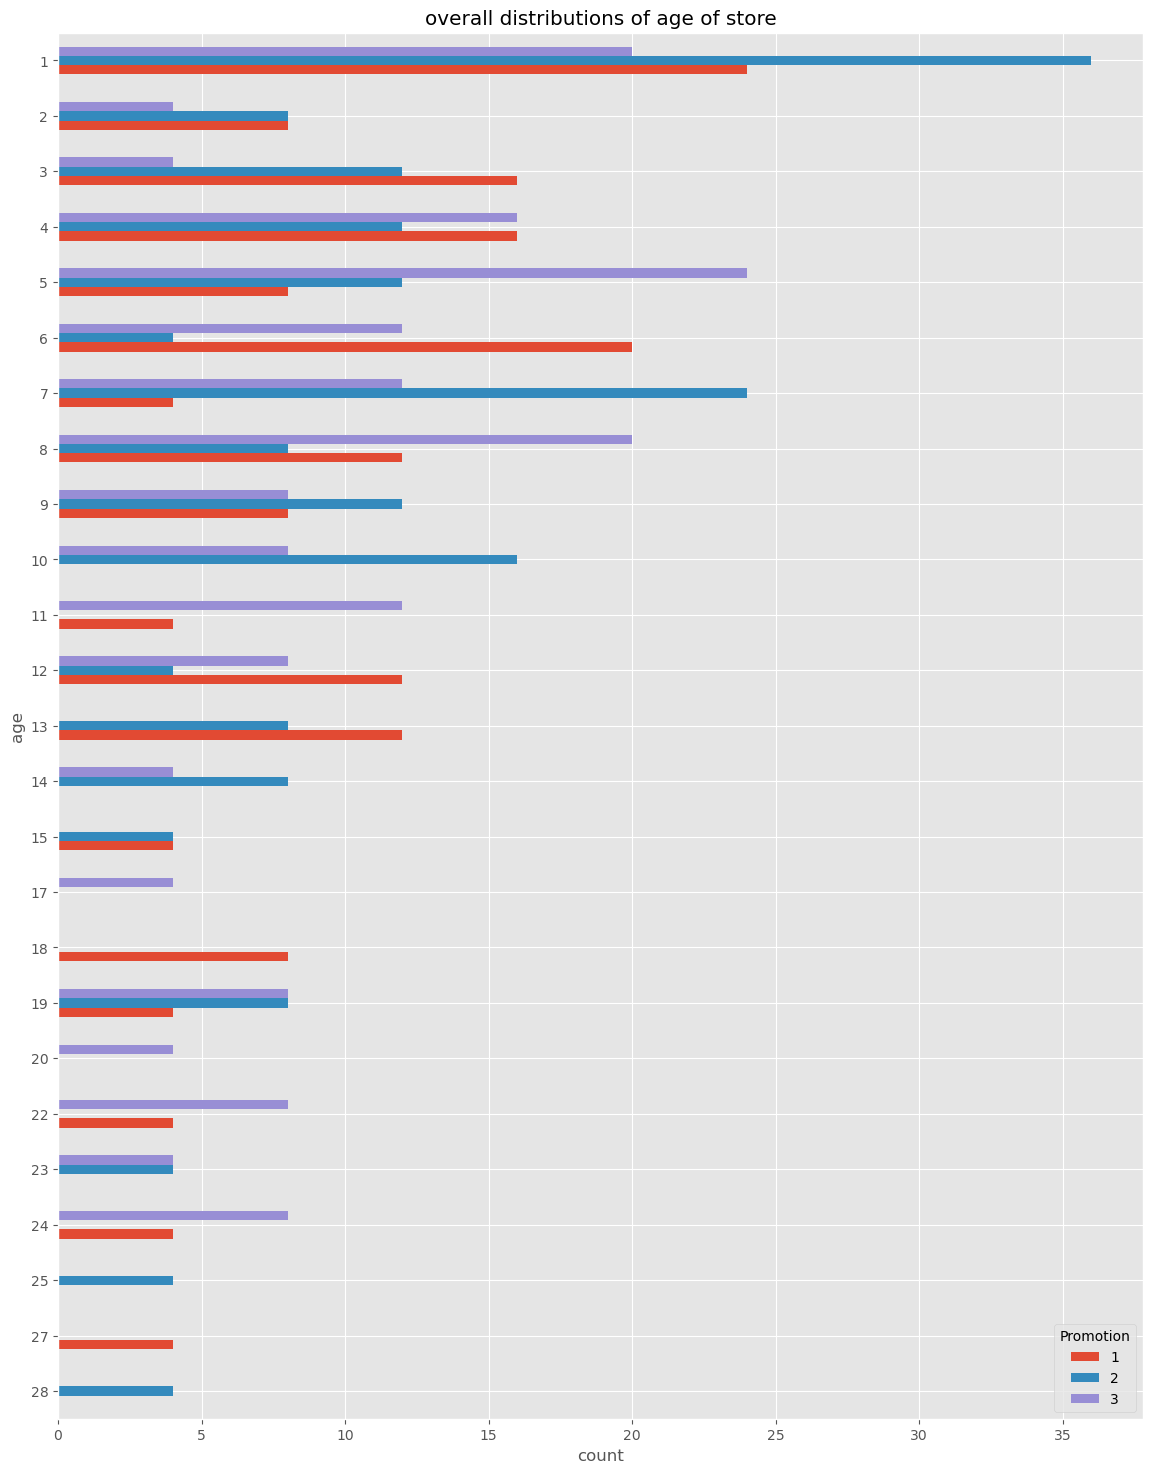

In [37]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [38]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0



The provided table helps us visualize the overall store age distribution based on the summary statistics.

All three test groups exhibit similar age profiles, with an average store age of around 8 to 9 years. The majority of stores fall within the 10-12 year age range or are even younger.

The similarity between the store profiles suggests that our sample groups are well-controlled, leading to meaningful and trustworthy A/B testing results.

# Performing A/B Testing

In [47]:
means = df.groupby('Promotion')['SalesInThousands'].mean()
stds = df.groupby('Promotion')['SalesInThousands'].std()
ns = df.groupby('Promotion')['SalesInThousands'].count()
print(means)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


**T-Value**

The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the grups. 

**P-Value**

P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups

# Comparing Promotion 1 vs Promotion 2 in an A/B Test

In [48]:
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# Analysis of P and t-values
 Our **P-Value is close to 0** which suggests that there is good evidence to **REJECT the Null Hypothesis**. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

Our **t-test** shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2. 


# Comparing Promotion 1 vs Promotion 3 in an A/B Test

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results:

In [75]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# Analysis of P and t-values

The mean sales for promotion group 1 (58.1) appears higher than that of promotion group 2 (55.36).

However, when conducting a t-test between these groups, the resulting p-value of 0.121 exceeds the conventional threshold of 0.05 for statistical significance by a significant margin.